## Linear Regression from scratch using OLS

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
def read_csv(filename):
    data = pd.read_csv(filename)
    print(data.head())
    print("\n")
    X = data.iloc[:,:-1].values
    Y = data.iloc[:,1].values
    return (data,X,Y)


In [3]:
def estimate_coefficients(X,Y):
    n = np.size(X)
    mean_X, mean_Y = np.mean(X), np.mean(Y)
    
    covariance_XY = 0
    variance_X = 0
    
    for i in range(n):
        covariance_XY += ((X[i] - mean_X) * (Y[i] - mean_Y))/n
        variance_X += ((X[i] - mean_X)** 2)/n
        
    b_1 = covariance_XY / variance_X
    b_0 = mean_Y - (b_1*mean_X)
    
    print("Slope is : " + str(b_1))
    print("Intercept is : " + str(b_0))
    
    return (b_1, b_0)


In [4]:
def plot_regression_line(X, Y, b_1, b_0 ):
    
    plt.scatter(X,Y, color='red')
    
    y_pred = b_0 + b_1*X
    
    plt.plot(X, y_pred, color='blue')
    plt.xlabel("YearsExperience")
    plt.ylabel("Salary")
    plt.title('Salary vs Experience')
    plt.show()
    

In [5]:
def RMSE(X, Y, b_1, b_0):
    
    n = np.size(X)
    rmse = 0
    for i in range(n):
        y_pred = b_0 + b_1 * X[i]
        rmse += (Y[i] - y_pred) ** 2
    rmse = np.sqrt(rmse/n)
    print("Root Mean Squared Error is : " + str(rmse))

In [6]:
def R_Squared(X, Y, b_1, b_0):
    
    n = np.size(X)
    mean_Y = np.mean(Y)
    
    sst = 0
    ssr = 0
    
    for i in range(n):
        y_pred = b_0 + b_1 * X[i]
        sst += (Y[i] - mean_Y) ** 2
        ssr += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (ssr/sst)
    print("R-Squared value is : " + str(r2))

In [7]:
def main():
    data, X, Y = read_csv('Salary_Data.csv')
    b1,b0 = estimate_coefficients(X,Y)
    plot_regression_line(X, Y, b1, b0)
    RMSE(X, Y, b1, b0)
    R_Squared(X, Y, b1, b0)
    

   YearsExperience   Salary
0              1.1  39343.0
1              1.3  46205.0
2              1.5  37731.0
3              2.0  43525.0
4              2.2  39891.0


Slope is : [9449.96232146]
Intercept is : [25792.20019867]


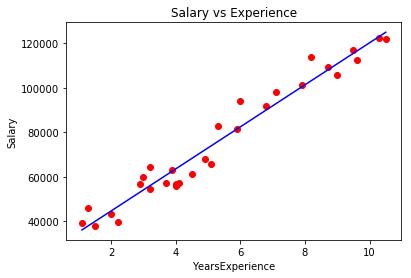

Root Mean Squared Error is : [5592.04360876]
R-Squared value is : [0.95695666]


In [8]:
if __name__ == "__main__":
    main()